##  Decision Tree Regression

- One of the most widely used and practical methods for inductive inference
- Approximates discrete-valued functions (including disjunctions)
- Can be used for classification or regression since accept any variable.
- Are attractive models if we care about interpretability. Like the name decision tree suggests, we can think of this model as breaking down our data by making decisions based on asking a series of questions
- Unlike linear models, decision trees are able to capture non-linear interaction between the features and the target.
- In classification is used Information Gain (IG) function, in regression we use MSE

![Decision Tree Example](../img/reg15.png)

### Decision Tree in a Regression Problem

When predicting a numeric variable, the idea of a tree construction remains the same, but the quality criteria changes: 

- Variance around the mean (or variance reduction): 

$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i) $$

where $\ell$ is the number of samples in a leaf, $y_i$ is the value of the target variable. Simply put, by minimizing the variance around the mean, we look for features that divide the training set in such a way that the values of the target feature in each leaf are roughly equal.

- Each internal node represents a test on an feature resulting on the split of the current sample.
- At each step the algorithm selects the feature and a cutoff value that maximises a given metric.
- Different metrics exist for regression tree (target is continuous) or classification tree (the target is qualitative).

**Note:** is that tree based models are not designed to work with very sparse features. When dealing with sparse input data (e.g. categorical features with large dimension), we can either pre-process the sparse features to generate numerical statistics, or switch to a linear model, which is better suited for such scenarios.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline

### Code Dictionary
code | description
-----|------------
`.iloc` | Pandas purely integer-location based indexing for selection by position.
`.DecisionTreeRegressor` | Regression model with Decision Trees.
`.arrange()` | Generates evenly spaced values within a given interval.
`.reshape()` | Gives a new shape to an array without changing its data.

In [2]:
dataset = pd.read_csv('../datasets/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values.reshape(-1, 1)

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Text(0,0.5,'Salary')

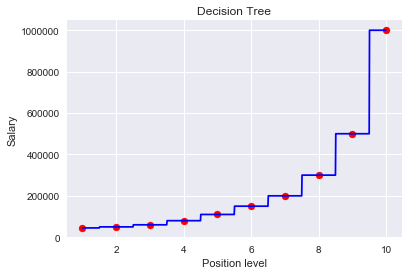

In [6]:
X_grid = np.arange(min(X), max(X), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree')
plt.xlabel('Position level')
plt.ylabel('Salary')


Why chose decision trees?
Different kinds of models have different advantages. The decision tree model is very good at handling tabular data with numerical features, or categorical features with fewer than hundreds of categories. Unlike linear models, decision trees are able to capture non-linear interaction between the features and the target.